# Assignment 8 - Computer Applications in Physics

Nonlinear curve fit using nonlinear conjugate gradient method for a damped oscillator.

Yu Jiawei (586067)

In [28]:
# Import the necessary packages
import numpy as np
import scipy, scipy.optimize
import xlrd
import matplotlib.pyplot as mpl

## Loading the Data File

We are going to use `xlrd.open_workbook()` to open the xlsx-workbook and load the data to a numpy array.

In [29]:
# Open the first sheet of "Schwingung.xlsx"
# They a supposed to be in the same folder
DT1_workbook = xlrd.open_workbook('Schwingung.xlsx')
DT1_sheet1 = DT1_workbook.sheet_by_index(0)
N_row = DT1_sheet1.nrows
N_colu = DT1_sheet1.ncols

# Read and store up the data
# Preallocate a numpy array for storage
Data = np.zeros((N_row,N_colu))

# Pass the value to the array
for i in np.arange(N_row):
    for j in np.arange(N_colu):
        Data[i, j] = DT1_sheet1.cell(i, j).value


These experimental data can be illustrated in a graph as follows.

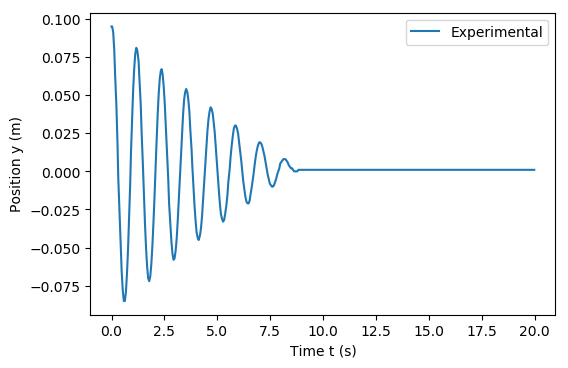

In [30]:
# Plot the original data
Graph1 = mpl.figure(dpi=100)
mpl.plot(Data[:,0],Data[:,1],label='Experimental')
mpl.xlabel('Time t (s)')
mpl.ylabel('Position y (m)')
mpl.legend(loc='best')
mpl.show()

## Fit Function of Damped Oscillation

Applied a restoring force $F=-k_F x$, we knew from the lectures of mechanics that the differential equation of motion $f(\ddot y,\dot y,y,t)=0$ for a damped harmonic oscillator of mass $m$ is

$$ m \ddot y + b \dot y + k_F y = 0 $$

where $b$ is the viscous damping coefficient and $k_F$ is the stiffness constant.

Dividing both sides by $m$, we have

$$ \ddot y + 2\gamma \dot y + \omega_0^2 y = 0 $$

where $\gamma = b/2m$ is the damping coefficient and $\omega_0 = \sqrt{k_F/m}$ is the undamped angular frequency, whose solution is

$$ y(t) = y_0 e^{-\gamma t} \cos(\omega' t + \varphi_0) $$

with $\omega' = \pm \sqrt{\omega_0^2-\gamma^2} $

In [38]:
# Define the fit function
def y_model(t, para):
    y0, gamma, omega, phi0 = para
    y_out = y0 * np.exp(-gamma*t) * np.cos(omega*t + phi0)
    return y_out

## An Error Function to be Minimized

As for the error function, the residual sum of squares is taken into consideration since the measurements of the position $y_i$ respecting the time $t_i$ are not repeated, indicating that the variance $\sigma^2_i=1$.

$$ \chi^2 = \frac{RSS}{\sigma^2_i} = \sum_{i=1}^{N} \left[ y_i-y_\mathrm{Fit}(t_i) \right]^2 $$

In [35]:
# Define the error function
def chi_sq(para, y, t):
    y0, gamma, omega, phi0 = para
    y_residual = y - y_model(t, para)
    chi_sq_out = np.sum(y_residual**2)
    return chi_sq_out

## Nonlinear Conjugate Gradient Method

Expand the error function $\chi^2$ at $\vec c_\mathrm{opt}$

$$ \chi^2 (\vec{c}) = \chi^2 (\vec{c}_\mathrm{opt}) + \nabla{\chi^2}(\vec{c}) \cdot \left(\vec c - \vec c_\mathrm{opt} \right) + O(\vec{c}^2) $$

Since the gradient indicates the direction of maximum increase, the error function $\chi^2$ is minimized in the steepest descent direction

$$\begin{array}{rl}
\Delta\vec{c} = -\nabla{\chi^2} &= -\left( \dfrac{\partial\chi^2}{\partial y_0},\ \dfrac{\partial\chi^2}{\partial \gamma},\ \dfrac{\partial\chi^2}{\partial \omega_0},\ \dfrac{\partial\chi^2}{\partial \varphi_0} \right) \\
&= 2\left[ y_i-y_\mathrm{Fit} \right] \cdot \left(\dfrac{y_\mathrm{Fit}}{y_0},\ -\gamma \cdot y_\mathrm{Fit},\ -y_0 t e^{-\gamma t} \sin(\omega' t + \varphi_0),\ -y_0 e^{-\gamma t} \sin(\omega' t + \varphi_0) \right)
\end{array}
$$

In [88]:
# Instantiate the initial guess
p0 = np.asarray([0.095, 0, 0.1, 0.01])

# Optimize the error function using "CG" method
res = scipy.optimize.minimize(chi_sq, p0, args=(Data[:,1], Data[:,0]), method='CG')

# Print the optimized parameters
print('The fitted parameters [y_0  gamma  omega  phi_0] are')
print(res.x, '\n')
print('Number of iterations:', res.nit, '\n')

m = 0.05 # The mass of the oscillator (kg)
omg_0 = np.sqrt(res.x[2]**2 - (res.x[1]*2*m)**2)
print('The undamped angular frequency:', omg_0, 'rad/s\n')

k_F = m * omg_0**2
print('The stiffness constant:', k_F, 'N/m')

The fitted parameters [y_0  gamma  omega  phi_0] are
[ 0.10777934  0.25020716 -5.36574859  0.11734111] 

Number of iterations: 81 

The undamped angular frequency: 5.365690256233429 rad/s

The stiffness constant: 1.4395315962919182 N/m


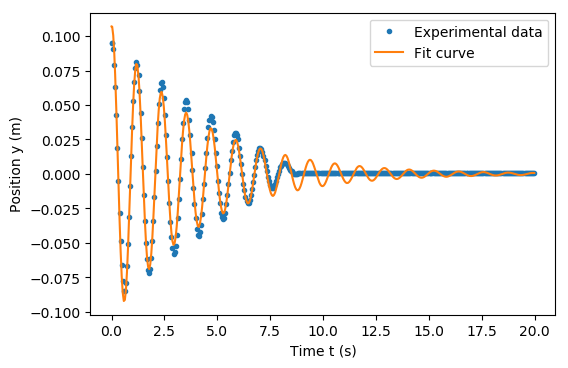

In [82]:
Fit1 = mpl.figure(dpi=100)
mpl.plot(Data[:,0], Data[:,1], '.', label='Experimental data')
mpl.plot(Data[:,0], y_model(Data[:,0], res.x), label='Fit curve')
mpl.xlabel('Time t (s)')
mpl.ylabel('Position y (m)')
mpl.legend(loc='best')
mpl.show()

## Variation of the Stiffness Constant

D:\Software\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in square
  """
D:\Software\Anaconda3\lib\site-packages\scipy\optimize\optimize.py:643: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
D:\Software\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in square
  """
D:\Software\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in square
  """
D:\Software\Anaconda3\lib\site-packages\scipy\optimize\optimize.py:643: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
D:\Software\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in square
  """
D:\Software\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in exp
  after removing the cwd from sys.path.
D:\Software\Anaco

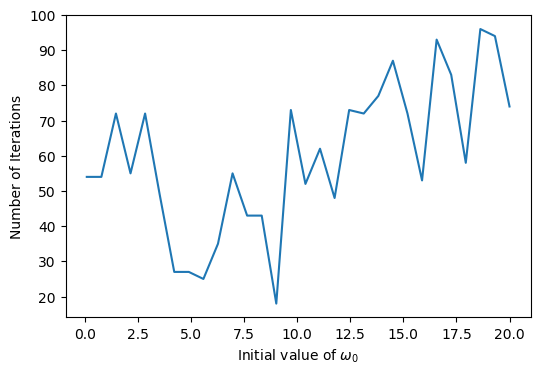

In [97]:
N = 30
omega_0 = np.linspace(0.1,20,N) # The undamped angular frequency (rad/s)

# We can simply obtain the corresponding stiffness constant
k_F = m * omega_0**2

#
Num_ite = np.zeros(N)
for i in np.arange(N):
    p0 = np.asarray([0.095, 0, omega_0[i], 0.1])
    res = scipy.optimize.minimize(chi_sq, p0, args=(Data[:,1], Data[:,0]), method='CG')
    Num_ite[i] = res.nit
    
Graph2 = mpl.figure(dpi=100)
mpl.plot(omega_0, Num_ite)
mpl.xlabel('Initial value of $\omega_0$')
mpl.ylabel('Number of Iterations')
mpl.show()